# Análise Dados Titanic


Realizar uma análise dos dados do desastre do Titanic.

### Data Wrangling


Além das informações básicas que irei retirar da base de dados, tentarei responder algumas questões, como:


    1) A idade foi determinante para as chances de sobrevivência?
    2) Mulheres e crianças tiveram maiores chances de sobrevivência?
    3) Quem estava sozinho, teve uma chance maior de sobreviver?
    4) Quem estava na 1ª classe teve mais chance de sobrevivência do que uma pessoa na 3ª classe?
  
  Para responder essas questões, foi utilizada a base : https://www.kaggle.com/c/titanic
  
  Existem as seguintes variáveis : 
  
  
      PassengerId : ID do passageiro;
      Survived : Sobreviveu? 0=Não , 1 = Sim;
      Pclass : Classe do Bilhete : 	1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe;
      Name: Nome do passageiro;
      Sex: Sexo do passageiro;
      Age: Idade;
      SibSp: Número de irmãos, irmãs, esposas ou esposos a bordo;
      Parch: Número de mães, pais, filhos ou filhas a bordo;
      Ticket: Número do ticket;
      Fare: Tarifa;
      Cabin: Número da cabine;
      Embarked: Local de embarque : C = Cherbourg, Q = Queenstown, S = Southampton;
      
      

In [90]:
%matplotlib inline

# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


titanic_data = pd.read_csv('titanic-data-6.csv')
    

In [122]:
#Descobrindo as váriaveis possíveis
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#Descobrindo a quantidade de pessoas listadas
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
#Remover os duplicados
titanic_data_duplicates = sum(titanic_data.duplicated())
print(titanic_data_duplicates)

0


Não possui dados duplicados

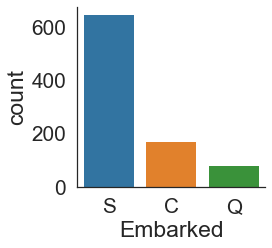

In [130]:
#Embarque em cada um dos portos.

g = sns.factorplot('Embarked',data=titanic_data, kind="count")
g.set_xticklabels(["S", "C", "Q"])

Percebemos que o Porto com maior número de embarques foi o de Southampton.

Para resolver as 3 perguntas que fizemos no ínicio deste notebook, algumas colunas nãos seram utilizadas, como : ID do passageiro, ticket,cabine e Local de embarque

In [37]:
#Retirando as colunas
titanic_data_without_columns = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin' , 'Embarked'], axis = 1)
titanic_data_without_columns.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [38]:
# Calculando o número de vazios
titanic_data_without_columns.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Percebemos que 177 pessoas estão com a coluna idade zerada.


In [39]:
# Determinando, das 177 pessoas, quantos são homens e quantos são mulheres.

missing_age_female = titanic_data_without_columns[pd.isnull(titanic_data_without_columns['Age'])]['Sex'] == 'female'
missing_age_male = titanic_data_without_columns[pd.isnull(titanic_data_without_columns['Age'])]['Sex'] == 'male'

print (missing_age_female.sum(),missing_age_male.sum())


53 124


Portanto, dos 177 sem idade : 53 são mulheres e 124 homens.

In [40]:
# Verificando as variáveis
titanic_data_without_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


Percebemos que , como já havíamos concluído, a única coluna que possui valores vazios, é a de idade. Como a questão (1) envolve a varíavel idade, poderiam ocorrer complicações, porém, como vamos utilizar gráficos, essas informações serão 0, iremos retirar esses valores para conclusões.

### Exploration and Visualization

In [41]:
titanic_data_without_columns.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
#Observando alguns dos bebês, se sobreviveram ou não.
titanic_data_without_columns[titanic_data_without_columns['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
78,1,2,male,0.83,0,2,29.0000
305,1,1,male,0.92,1,2,151.5500
469,1,3,female,0.75,2,1,19.2583
644,1,3,female,0.75,2,1,19.2583
755,1,2,male,0.67,1,1,14.5000
803,1,3,male,0.42,0,1,8.5167
831,1,2,male,0.83,1,1,18.7500


In [43]:
#Observando alguns dos idosos, se sobreviveram ou não.
titanic_data_without_columns[titanic_data_without_columns['Age'] > 70]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
96,0,1,male,71.0,0,0,34.6542
116,0,3,male,70.5,0,0,7.7500
493,0,1,male,71.0,0,0,49.5042
630,1,1,male,80.0,0,0,30.0000
851,0,3,male,74.0,0,0,7.7750


In [44]:
youngest_die = titanic_data_without_columns[titanic_data_without_columns['Survived'] == False]['Age'].min()
print(youngest_die)

1.0


Percebemos que todos os bebês com menos de 1 ano de vida sobreviveram. Outras informações :

A mais nova vítima fatal tinha 1 ano de idade.
A mais velha vítima fatal tinha 74 anos de idade.
O mais velho a sobreviver tinha 80 anos.
O mais novo a sobreviver tinha 0.42 anos.


### Questão 1 - A idade foi determinante para as chances de sobrevivência?

In [45]:
# Retirando os valores de 0
titanic_data_without_columns = titanic_data_without_columns.dropna()
#Descobrindo quantos sobreviveram e a idade média.
numero_sobreviventes = titanic_data_without_columns[titanic_data_without_columns['Survived'] == True]['Survived'].count()
numero_mortos = titanic_data_without_columns[titanic_data_without_columns['Survived'] == False]['Survived'].count()
#Descobrindo média de idade
media_idade_sobreviventes = titanic_data_without_columns[titanic_data_without_columns['Survived'] == True]['Age'].mean()
media_idade_mortos = titanic_data_without_columns[titanic_data_without_columns['Survived'] == False]['Age'].mean()

print(numero_sobreviventes)
print(numero_mortos)
print(np.round(media_idade_sobreviventes))
print(np.round(media_idade_mortos))

290
424
28.0
31.0


Numero Sobreviventes = 290
Numero Mortos = 424
Media Idade Sobreviventes = 28 anos
Media Idade Mortos = 31 anos

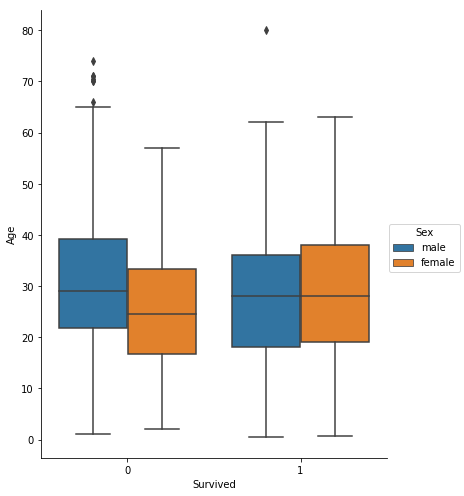

In [46]:
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_without_columns, kind="box", size=7, aspect=.8)

Percebemos pelo gráfico, que não houve diferença de idade entre os que sobreviveram e que morreram, portanto, a idade não foi relevante

### Questão 2 - Mulheres e crianças tiveram maiores chances de sobrevivência?

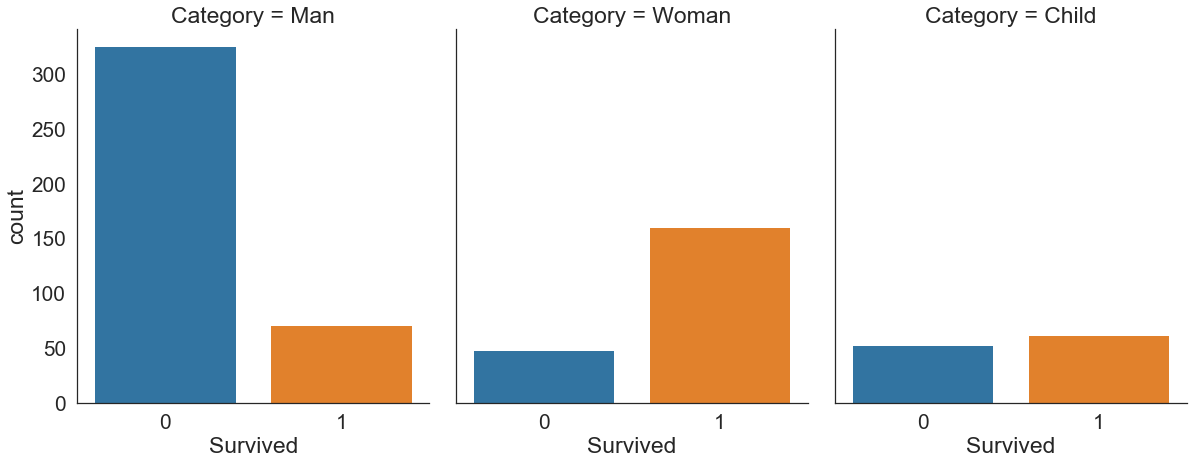

In [145]:
#Criando categorias
titanic_data_without_columns.loc[
    ( (titanic_data_without_columns['Sex'] == 'female') & 
    (titanic_data_without_columns['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_without_columns.loc[
    ( (titanic_data_without_columns['Sex'] == 'male') & 
    (titanic_data_without_columns['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_without_columns.loc[
    (titanic_data_without_columns['Age'] < 18),
    'Category'] = 'Child'


g = sns.factorplot('Survived', col='Category', data=titanic_data_without_columns, kind='count', size=7, aspect=.8)


Percebemos, pelos gráficos, que a quantidade de homens que não sobreviveram é superior a 300 pessoas, e os que sobreviveram não chegam a 75. Por outro lado, o número de mulheres que sobreviveram é superior a 150, contra as aproximadamente 50 que faleceram, com relação as crianças, existe uma superioridade no número de sobreviventes x falecidos.

Como conclusão, podemos determinar que o código de conduta datado de 1852 : " Mulheres e crianças primeiro", foi aplicado nesta situação.

### Questão 3 - Quem estava sozinho, teve uma chance maior de sobreviver?

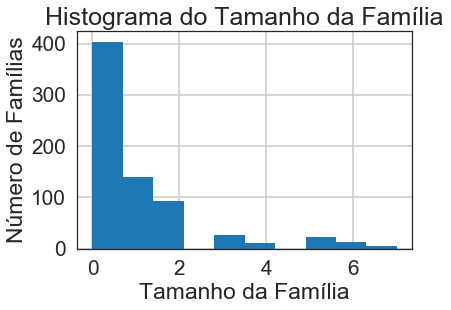

In [143]:
titanic_data_without_columns['Family_Size'] = titanic_data_without_columns['SibSp'] + titanic_data_without_columns['Parch']
titanic_data_without_columns['Family_Size'].hist(bins=10)
plt.xlabel('Tamanho da Família')
plt.ylabel('Número de Famílias')
plt.title('Histograma do Tamanho da Família')
plt.show()

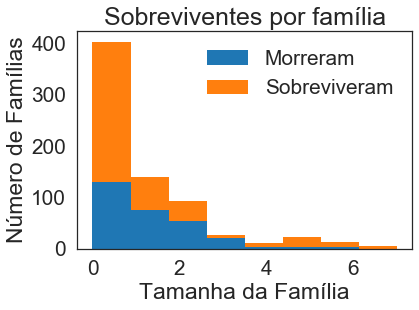

In [142]:
family_sizes=sorted(titanic_data_without_columns['Family_Size'].unique())
family_sizesfamily_si =sorted(titanic_data_without_columns['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=titanic_data_without_columns[titanic_data_without_columns['Survived']==1]['Family_Size']
family_size_not_survived=titanic_data_without_columns[titanic_data_without_columns['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Morreram', 'Sobreviveram'), loc='best')
plt.xlabel('Tamanha da Família')
plt.ylabel('Número de Famílias')
plt.title('Sobreviventes por família')
plt.show()


Podemos perceber pelo gráfico, que a grande maioria das pessoas que estavam sozinhas conseguiram sobreviver, diferentemente das famílias com 2,3 e 4 pessoas. Isso pode ser explicado pelo imediatismo das ações, uma pessoa sozinha não precisa se preocupar com os familiares, facilitando assim a sua saída e consequente sobrevivência.

### Questão 4) Quem estava na 1ª classe teve mais chance de sobrevivência do que uma pessoa na 3ª classe?

96.47
39.6
91.89
15.15
46.08
15.02


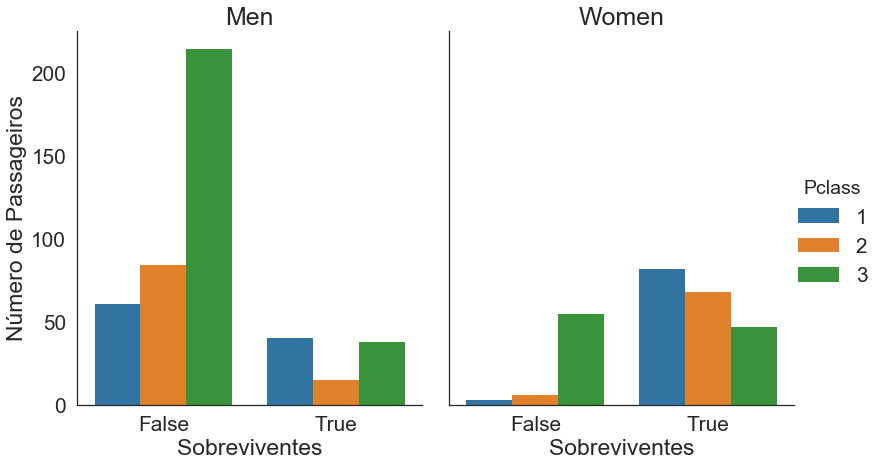

In [141]:
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_without_columns.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
    titanic_data_without_columns.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

groupedby_class_survived_size = titanic_data_without_columns.groupby(['Pclass','Survived','Sex']).size()


print (survival_rate(1,'female'))
print (survival_rate(1,'male'))
print (survival_rate(2,'female'))
print (survival_rate(2,'male'))
print (survival_rate(3,'female'))
print (survival_rate(3,'male'))


#Gráfico

g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_without_columns, kind='count', size=7, aspect=.8)


(g.set_axis_labels('Sobreviventes', 'Número de Passageiros')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Percebemos por esse gráfico, que um passageiro da 1ª classe tinha uma chance muito maior de conseguir sobreviver do que um passageiro da 3ª classe.

### References and External Software links


https://en.wikipedia.org/wiki/RMS_Titanic

https://www.kaggle.com/c/titanic

https://www.kaggle.com/c/titanic/data

https://en.wikipedia.org/wiki/NumPy

http://pandas.pydata.org/pandas-docs/stable/#

https://en.wikipedia.org/wiki/Plotly